# <center>**Linear Regression**</center>

## **1. Simple Linear Regression**

### 1.1 Data

Manager Restourant ingin mengetahui faktor mana yang penting untuk diperhatikan saat manager hendak mengalokasikan pelayannya kepada pelanggan.

ANALIZE TIPS DATA FROM SEABORN.
* Total Bill as **Independent Variable, X, Feature**
* Tips as **Dependent Variable, Y, Label**

Analyze the relationship\
Apply simple linear regression\
Perform F Test and T Test\
Interpret the result

* use alpha 5% 

In [12]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


In [13]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1.2 Pembuatan Model

Pembuatan Model
- **tips** sebagai dependent variabel (Y)
- **total bill** sebagai independent variabel (X)

In [14]:
y = tips["tip"] #Dependent
x = tips[["total_bill"]] #Independent

# Ketika kita membuat model dengen definisi seperti ini yang akan kita peroleh adalah
# model tanpa intersep. Agar ada intersepnya, kita gunakan fungsi:

x = sm.add_constant(x) #artinya menambah intersep

In [15]:
#Pendefinisian model
model = sm.OLS(y, x) 

#Fitting model
result = model.fit()

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           6.69e-34
Time:                        13:57:43   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0


Output yang perlu dibaca:
1. R-square 
2. Prob (F-statistic) # F-test
3. Coef masing-masing variabel # B0 dan B1
4. Prob coef masing-masing variabel # T-test prob dari B0 dan B1


Model :

> $y = 0.9023 + 0.1050x$

### 1.3 Interpretasi



1. R-quare: 45,7% \
   Artinya **Model dapat menjelaskan 45.7% variasi nilai tips**, sisanya tidak dapat dijelaskan dengan model.
   
2. Prob (F-Statistics):  6.69e-34 = 0.000...069 < 0.05 (alpha 5%) \
   Artinya **total bill berpengaruh secara signifikan terhadap tips.** #(Tapi kita belum tahu arahnya)

3. Uji T
   - B0 P-Value: 0.000... < 0.05 \
   Artinya kita memerlukan intersep dalam model.

   - B1 P-Value: 0.000... < 0.05 (signifikan)\
   Artinya total bill berpengaruh secara positif terhadap tips. (Kenapa positf? Kerena nilai 'coef' total billnya positif)

4. B0 dan B1: 
   - B0: (y = B0 + B1x), y saat x = 0, tips ketika total bill bernilai 0. Maka tidak perlu diinterpretasikan karena tidak mungkin total bill 0.
   - B1 = Setiap kenaikan 1 dollar pada total bill, makan akan meningkatkan B1 atau sebesar 0.1050 dollar.



## **2. Multiple Linear Regression**

### 2.1 Data

Analyze tips data from seaborn
* Total bill  and Size as **Independent Variable (Independet, X, features)**
* Tips as **Dependent Variable (Dependent, Y, label)**

Analyze the relationship \
Apply multiple Linear Regression \
Perform F Test and T Test \
Interpret the result
* Use α 5%

In [17]:
import statsmodels.api as sm
import seaborn as sns

In [18]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 2.2 Model

In [19]:
y = tips['tip'] #dependent

x = tips[['total_bill','size']] #independent

x = sm.add_constant(x) # add constant

In [20]:
model = sm.OLS(y,x) #definisi model

# training / fitting model
result = model.fit()

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           9.67e-34
Time:                        13:57:43   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0


Output yang perlu dibaca:
1. Adj. R-squared: 0.463 (46,3%)
1. Prob (F-statistic): 9.67e-34
1. Prob masing-masing beta: ß0 ß1 ß2

    | prob |       |
    | --- | ------|
    | prob ß0 | 0.001|
    | prob ß1 | 0.000|
    | prob ß2 | 0.025| 


1. ß0 ß1 ß2:

    | ß |       |
    | --- | ------|
    | ß0 | 0.6689 |
    | ß1 | 0.0927|
    | ß2 | 0.1926|

Kita akan melakukan analisis regresi, uji f, uji t dan interpretasi hasil keseluruhan

1. **Adj. R-squared: 0.463 (46,3%)**<br>
    Artinya, model dapat menjelaskan variasi nilai tips sebesar 46,3%. Sisanya dijelaskan oleh variabel lain yang tidak terdapat dalam model.
1. **Prob (F-statistic): 9.67e-34 < 0,05 (tolak H0)** <br>
    Artinya, minimal ada salah satu independet variabel( total_bill dan/atau size) yang berpengaruh terhadap tips.
1. **Uji T. Prob masing-masing beta: ß0 ß1 ß2**

    | prob |       |Artinya|
    | --- | ------|---|
    | prob ß0 | 0.001 < 0.05 (tolak H0)| Model memerlukan intersep
    | prob ß1 | 0.000 < 0.05 (tolak H0)| total_bill berpengaruh secara positf terhadap tip
    | prob ß2 | 0.025 < 0.05 (tolak H0)| size berpengaruh secara positf terhadap tip| \
<br>


1. ß0 ß1 ß2: 

    | ß |       | Interpretasi   |
    | --- | ------|---|
    | ß0 | 0.6689 | nilai tip (y) saat total_bill 0 dan size 0 (*tidak perlu diinterpretasikan karena logikanya jika tidak ada pelanggan maka tidak ada tip*)|
    | ß1 | 0.0927| setiap kenaikan total_bill sebesar $1 akan meningkat kira-kira sebesar $0.0927. Interpretasi ß1 untuk total_bill hanya berlaku dalam selang $3.07 hingga $50.81.
    | ß2 | 0.1926| setiap kenaikan total_bill sebesar 1 orang akan meningkat kira-kira sebesar $0.1926. Interpretasi ß2 untuk size hanya berlaku dalam selang 1 hingga 6 orang.



Model:
> $tips = 0.6689 + 0.0927 total bill + 0.025 size$

In [22]:
tips[['total_bill','size']].describe()

,total_bill,size
count,244.000000,244.000000
mean,19.785943,2.569672
std,8.902412,0.951100
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.000000
75%,24.127500,3.000000
max,50.810000,6.000000


## **3. Diagnostic**

### 3.1 Diagnistic & Multicollinear

Residual = Nilai sebenarnya - Nilai Prediksi

Ordinary Least Square (OLS) metode untuk estimasinya

Residual -> Sampel<br>
Error -> Population

Asumsi yang harus dipenuhi:
1. Model regresi linear dalam parameter dan error
1. Asumsi metode least square (Gauss-Markov) terpenuhi
    * Rata-rata error pada populasi adalah nol
    * Error tidaka berkorelasi dengan error lainnya
    * Error memiliki ragam yang homogen

Pemeriksaan Asumsi kenormalan:
1. Histogram
1. qqplot
1. Uji normalitas:
    * Kolmogorov-smirnov (KS), Jarque-Bera (JB)
    * H0 =  Normal
    * H1 = Not Normal
    * Tolak H0 : P-Value < alpha



| Asumsi | Dampak Jika Dilanggar     | Solusi   |
| --- | ------|---|
| Rataan Error bernilai nol | Bias pada nilai estimasi dan hasil prediksi |  |
| Error tidak berkorelsi | P-Value dari F-test dan T-test cenderung bernilai kecil padahal seharutnya tidak (Underestimate). Dapat membuat keliru mengambil keputusan untuk tolak atau terima H0. Nilai R-Squae akan lebih tinggi dari nilai seharusnya (Over Estimate)| Add nonlinrar component or change the model to non linear. Change the method. transformation: Y-New = Log(Y), Y-new = sqrt (Y), etc
| Homogen | Tidak stabilnya nilai prediksi maupun hasil estimasi regresi| 


MULTICOLLINEARITAS

* Multikolinearitas : Nilai korelasi yang tinggi antara variabel independen

| Bahaya Multicollinearitas | Konsekuensi|
| ----- | --- |
| Ragam dari nilai estimasi parameter regresi menjadi tidak stabil krn terpengaruh multikol | P-Value dapat menjadi bias sehingga pengujian menggunakan T-Test pun menghasilkan tidak valid |
| Menambah atau mengurangi salah satu independen variabel dapat menyebabkan perubahan secara drastis nilai koefisien lainnya| Estimasi parameter tidak stabil|
| Nilai estimasi dari koefisian regresi mungkin dapat berubah, tandanya yang sehaarusnya positif menjadi negatif atau sebaliknya | Dapat menyebabkan kesalahan dalam menginterpretasikan model regresi| 


Ciri - ciri adanya multikolinieritas

* Nilai R-square tinggi, tapi hanya sedikit yang hasil uji T-nya signifikan

* Hasil dari uji F tolak H0, tapi hanya sedikit atau bahkan tidak ada sama sekali variabel independen yang hasil uji T-nya signifikan.

* Ada pasangan variabel independen yang korelasinya lebih kuat dari pada korelasi setiap variabel independen dengan variabel dependen.


Mylti kol dapat dideteksi dengan nilai VIF.

VIF > 10  mengindikasikan adanya masalah multikol yang serius
Batasnya < 4

### 3.2 Excercise: Diagnostic And Multicollinearity

Kita akan menganalisis faktor apa saja yang berpengaruh terhadap tips yang dikeluarkan oleh customer.

1. Analyze tips data from seaborn
    * Total Bill and Size as independent Variable
    * Tips as Dependen Variable
1. Apply Multiple Linear Regression
1. Check The Normality Assumption
1. Check The Gauss-Markov Assumption
1. Check The Multicollinearity

*1 dan 2 sudah dikerjakan maka langsung lanjut ke nomor 3

#### 3. Check Normalitas Residual

In [25]:
result.resid

0     -1.619340
1     -0.545394
2      0.305355
3      0.060408
4     -0.109157
         ...   
239    1.981794
240   -1.574089
241   -1.155952
242   -0.956292
243    0.204703
Length: 244, dtype: float64

ini lah yang akan kita gunakan untuk memeriksa normalitas. kita gunakan histogram

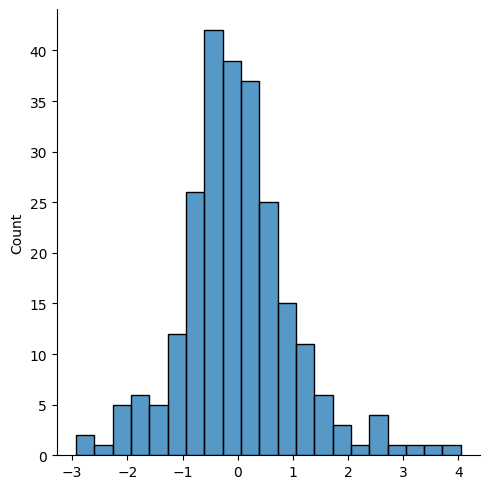

In [26]:
sns.displot(result.resid)

Terlihat menyebar normal, kita anggap asumsi terpenuhi.

#### 4. Cek Asumsi Gauss Markov

apa saja asumsinya?

1. Rataan error = 0
2. Error tidak saling berkorelasi
1. Homoscedastisitas, ragam error homogen.

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

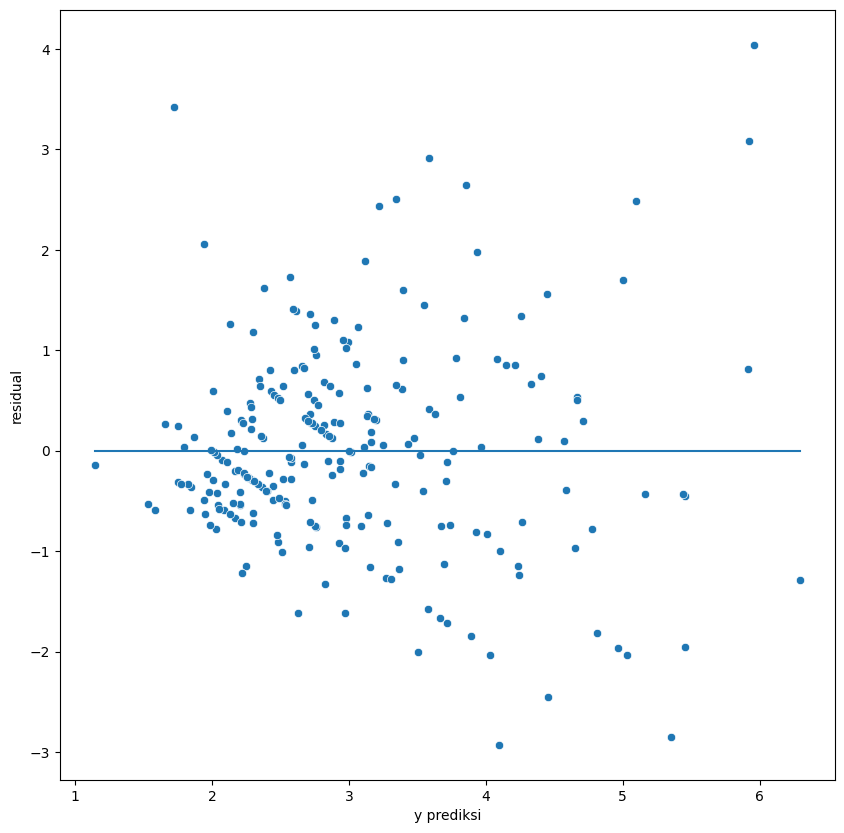

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.xlabel('y prediksi')
plt.ylabel('residual')
sns.scatterplot(x=result.fittedvalues, y = result.resid)
sns.lineplot(x = result.fittedvalues, y = 0)



Interpretasi:

1. Rataan error = 0, kita anggap terpenuhi karena error disekitar nilai 0
2. Error tidak saling berkorelasi, kita anggap terpenuhi karena tidak ada pola misalkan kuadratik atau pola lainnya.    
1. Homoscedastisitas, ragam error homogen. terlihat smakin besar nilai prediksi, semakin error semakin menyebar. maka terindikasi ada masalah omoscedastisitas tidak terpenuhi.    

#### 5 Check The Multicollinearity

In [38]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
x

,const,total_bill,size
0,1.0,16.99,2
1,1.0,10.34,3
2,1.0,21.01,3
3,1.0,23.68,2
4,1.0,24.59,4
...,...,...,...
239,1.0,29.03,3
240,1.0,27.18,2
241,1.0,22.67,2
242,1.0,17.82,2


In [41]:
variance_inflation_factor(x.values, 1) # 1 adalah nilai indexnya,total_bill

1.5575862919427272

buat function aja biar langsung semuanya

In [46]:
def hitung_vif(x):

    vif = pd.DataFrame()
    vif ['variabel'] = x.columns
    vif ['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [47]:
hitung_vif(x)

,variabel,vif
0,const,8.904095
1,total_bill,1.557586
2,size,1.557586


baris pertama tidak digunakan maka kita drop saja

In [48]:
x.drop(columns = 'const')

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [50]:
hitung_vif(x.drop(columns = 'const'))

,variabel,vif
0,total_bill,8.684373
1,size,8.684373


Interpretasi:

Ada indikasi masalah multikol karena nilai VIF > 4

#### SUMMARY

1. Normalitas kita naggap terpenuhi
2. Gauss Markov
    * Rataan Error = 0, kita anggap terpenuhi
    * Error tidak saling berkorelasi, kita anggap terpenuhi
    * Homoscedastisitas, ada indikasi tidak terpenuhi
3. Multikollinearitas, ada indikasi tidak terpenuhi

*Keterangan*

1. dari poin pertama, asumsi normalitas, hasil uji F dan uji T dari model kita itu Valid sehingga sah sah aja menggunakan hasil pengujian dari Uji F dan Uji T. jika tidak normal maka hasilnay tidak akan valid

2.  * poin 1 gaus markov terpenuhi. maka nilai beta dan nilai prediksinya tidak bias
    * R Square serta p-Value Uji T tidak bias. 
    * Hasil prediksi semakin besar nilainya semakin tidak stabil. solusi, penggunaan model lainnya.

3. Ada indikasi tidak terpenuhi walau tidak terlalu parah. beta total bill. Dampaknya nilai total bill meningkat sebesar 10 dollar tips akan meningkat kira-kira 1 dollar dengan catatan variabel lain (size) nilainya tetap. jadi interpretasi kita terkait beta kurang valid. solusinya memilih slah satu dari total bill dan size lebih penting yang mana yang akan digunakan, jadi nanti yang akan digunakan hanya salah satu feature saja. (*Feature Selection*)

## **4. Regression Dummy Variable**

1. Analyze tips data from seaborn
    * Total_Bill and Size as Numerical Independence Variable
    * Sex, smoker, day, and time as Categorical Independent Variable
    * Tips as Dependent Variable
2. Analyze the relationship
3. Apply Multiple Linear Regression with dummy variable
4. Perform Simultant Test and Partial Test
5. Check The Assumption
6. Interpret the result
*Use alpha 5%

In [51]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [63]:
q = tips.drop(columns = ['tip'])
v = tips ['tip']

z = pd.get_dummies(q, columns = ['sex','smoker','day','time'], drop_first = True)

z = sm.add_constant(z)

z

,const,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.0,16.99,2,1,1,0,0,1,1
1,1.0,10.34,3,0,1,0,0,1,1
2,1.0,21.01,3,0,1,0,0,1,1
3,1.0,23.68,2,0,1,0,0,1,1
4,1.0,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,1.0,29.03,3,0,1,0,1,0,1
240,1.0,27.18,2,1,0,0,1,0,1
241,1.0,22.67,2,0,0,0,1,0,1
242,1.0,17.82,2,0,1,0,1,0,1


#### Model

In [65]:
model = sm.OLS(v, z)

result = model.fit()

In [66]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           1.20e-28
Time:                        22:30:14   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

Output yang perlu dibaca:

1. add. R-sq = 45.2%
2. Prob (F-statistic) = 1.20e-28
3. Prob (T-statistic) = 
   1. b0 = 0.022
   1. b1 = 0.000
   1. dst
1. coef : b0 - bk, model: tips = 0.5908 + 0.0945 total_bill + 0.1760 size ... -0.0681 time_Dinner 